### Uvoz Knjižnic

Najprej uvozimo knjižnici **numpy** in **matplotlib.pyplot**.
Knjižnico **numpy.random** preimenujemo v **rnd**, da lahko pri klicanju ukazov iz te knjižnice namesto **numpy.random** preprosto napišemo **rnd**.

Z ukazom **%matplotlib notebook** omogočimo lepši prikaz grafov v okolju Jupyter Notebook, vključno z dinamičnimi prikazi in simulacijami.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd

In [39]:
%matplotlib notebook 

# Uporaba knjižnice numpy.random za generiranje naključnih števil

Osnovni ukaz **rand(N)** generira array z N naključno generiranimi števili med 0 in 1, ukaz **rand()** pa ustvari eno samo naključno število na istem intervalu.

In [40]:
rnd.rand(10)

array([0.35563538, 0.76423856, 0.90206659, 0.41452588, 0.22481561,
       0.44774782, 0.93378536, 0.91775917, 0.99287608, 0.49293805])

In [41]:
rnd.rand()

0.7650055862880782

Z ukazom **seed** poskrbimo, da računalnik pri vsakem zagonu programa generira enaka naključna števila.
Za ponazoritev poženite spodnjo kodo dvakrat in opazujte, ali se rezultati spremenijo.

In [43]:
rnd.seed(10)
rnd.rand(10)

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981])

In [45]:
rnd.rand(10)

array([0.54254437, 0.14217005, 0.37334076, 0.67413362, 0.44183317,
       0.43401399, 0.61776698, 0.51313824, 0.65039718, 0.60103895])

Spodnji graf prikazuje generiranje vzorcev 100 000 naključnih števil, ki sledijo različnim porazdelitvam.
Koda grafično prikaže porazdelitve s pomočjo **histogramov**.

Knjižnica matplotlib je že opremljena z ukazom za risanje histogramov — **plt.hist**.
S parametrom **bins** določimo število razdelkov (kanalov),
s parametroma **color** in **edgecolor** pa barvo stolpcev in barvo robov stolpcev.

<IPython.core.display.Javascript object>


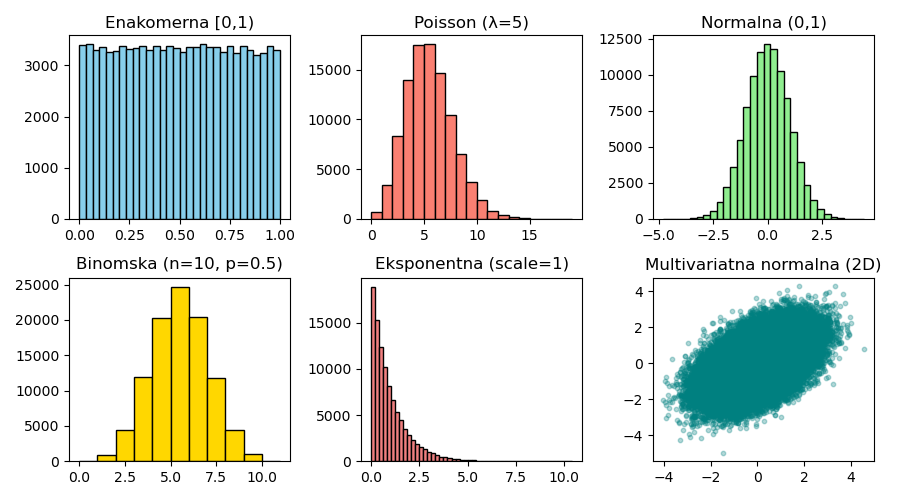

In [46]:
# Velikost vzorca
N = 100000

# ------------------- Različne porazdelitve -------------------
uniform_data = np.random.rand(N)  # Enakomerna [0,1)
poisson_data = np.random.poisson(lam=5, size=N)  # Poisson (λ=5)
normal_data = np.random.normal(loc=0, scale=1, size=N)  # Normalna (0,1)
binomial_data = np.random.binomial(n=10, p=0.5, size=N)  # Binomska
exponential_data = np.random.exponential(scale=1.0, size=N)  # Eksponentna
mvnormal_data = np.random.multivariate_normal(mean=[0,0],
                                              cov=[[1,0.5],[0.5,1]],
                                              size=N)  # Multivariatna normalna

# ------------------- Vizualizacija -------------------
fig, axs = plt.subplots(2, 3, figsize=(9, 5))

# 1. Enakomerna
axs[0, 0].hist(uniform_data, bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title("Enakomerna [0,1)")

# 2. Poisson
axs[0, 1].hist(poisson_data, bins=range(0,20), color='salmon', edgecolor='black')
axs[0, 1].set_title("Poisson (λ=5)")

# 3. Normalna
axs[0, 2].hist(normal_data, bins=30, color='lightgreen', edgecolor='black')
axs[0, 2].set_title("Normalna (0,1)")

# 4. Binomska
axs[1, 0].hist(binomial_data, bins=range(0,12), color='gold', edgecolor='black')
axs[1, 0].set_title("Binomska (n=10, p=0.5)")

# 5. Eksponentna
axs[1, 1].hist(exponential_data, bins=50, color='lightcoral', edgecolor='black')
axs[1, 1].set_title("Eksponentna (scale=1)")

# 6. Multivariatna normalna
axs[1, 2].scatter(mvnormal_data[:,0], mvnormal_data[:,1], alpha=0.3, s=10, color='teal')
axs[1, 2].set_title("Multivariatna normalna (2D)")

plt.tight_layout()
plt.show()


Z ukazom **randint(min, max, N)** generiramo enakomerno porazdeljena cela števila, z ukazom **shuffle** pa premešamo vrstni red elementov v seznamu (ali arrayu).

In [47]:
a=rnd.randint(1,20,10)
print(a)
rnd.shuffle(a)
print(a)

[ 8 13  4  9  3  6  8  8 11  4]
[ 6 13 11  4  3  8  8  4  9  8]


# Primeri uporabe

## 1. Monte Calo metoda za računanje števila Pi

**Monte Carlo** metode so skupina metod, pri katerih z generiranjem niza naključnih števil numerično rešujemo problem, ki je sicer deterministične narave.
Ena najbolj znanih Monte Carlo metod je metoda določanja števila $\pi$.

Naključno izžrebamo pare števil $(x, y)$ na intervalu med 0 in 1.
Ta števila predstavljajo koordinate točk, ki ležijo v kvadratu s stranico 1.
Če velja pogoj $x^2 + y^2 < 1$, pomeni, da se točka nahaja znotraj včrtane četrtine kroga.

Če izžrebamo dovolj veliko število takšnih parov, bo delež točk, ki izpolnjujejo pogoj $x^2 + y^2 < 1$, približno enak razmerju med površino četrtine kroga in površino kvadrata.
Ker je površina četrtine kroga $\pi r^2 / 4$, površina kvadrata pa $r^2$, kjer je $r = 1$, sledi:

$$
\pi \approx 4 \cdot \frac{N_{\text{krog}}}{N_{\text{skupaj}}}
$$


Večje kot je število izžrebanih parov, bolj natančna bo ocena za $\pi$.

Spodaj je prikazan preprost program, s katerim lahko to dosežemo.

In [48]:
N=100000
znotraj=0
for i in range(N): 
    x=rnd.rand()
    y=rnd.rand()
    if x**2+y**2<1:
        znotraj+=1
print(znotraj/N*4)        
    

3.13568


Prikažimo še grafično:

<IPython.core.display.Javascript object>


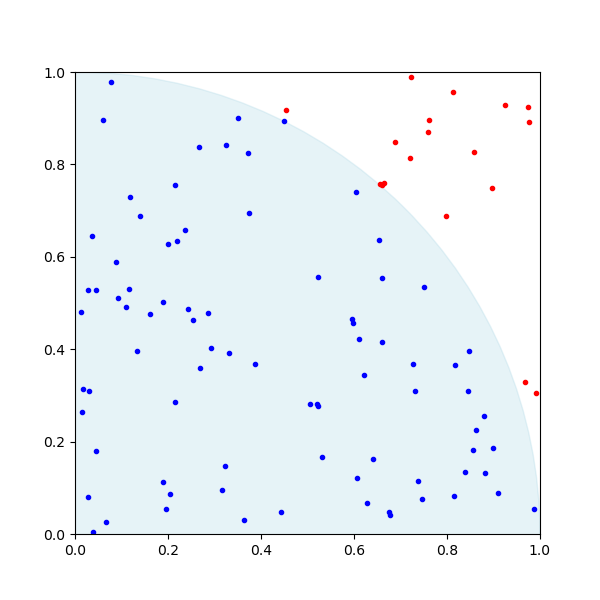

In [49]:
#Rišemo 100 točk
N=100 
#pripravimo grafiko z enim grafom velikosti 6 x 6
fig,ax = plt.subplots(figsize=(6,6)) 
#pripravimo krog, center je v točki (0,0), radij kroga je 1, notranjost kroga naj bo svetlo modre barve 
#prosojnost kroga naj bo 30% oziroma o.3
krog=plt.Circle((0,0),1,color='lightblue',alpha=0.3) 
#dodajmo krog na graf
ax.add_patch(krog)
#x-os naj teče od 0 do 1 in prav tako y-os
ax.set_xlim(0,1)
ax.set_ylim(0,1)
tocke_znotraj=[]
tocke_zunaj=[]
for i in range(N): 
    x=rnd.rand()
    y=rnd.rand()
    if x**2+y**2<1:
        znotraj+=1
        tocke_znotraj.append((x,y))
        #narišemo piko modre barva na koordinatah x in y 'bo' - b pomeni modra, o pa da nariše piko
        ax.plot(x,y,'bo',markersize=3) #"bo" - modre pike, markersize določa velikost pike
    else:
        #narišimo piko rdeče barve
        tocke_zunaj.append((x,y))
        ax.plot(x,y,'ro',markersize=3)   #"ro" - rdeče pike, markersize določa velikost pike
plt.show()

## Napredno - za tiste ki želijo izvedeti več

Ustvarimo še animacijo. Imamo dve možnosti: uporabo ukaza **FuncAnimation** ali **ArtistAnimation**.
Pri prvi najprej ustvarimo podlago in nato določimo elemente, ki jih bomo spreminjali,
pri drugi pa ustvarimo niz posameznih grafov in jih dodamo v seznam, iz katerega se izdela filmček.

Mi bomo uporabili prvo varianto, ker deluje hitreje.
Več o izdelavi animacij v Pythonu najdete na https://matplotlib.org/stable/users/explain/animations/animations.html

<IPython.core.display.Javascript object>


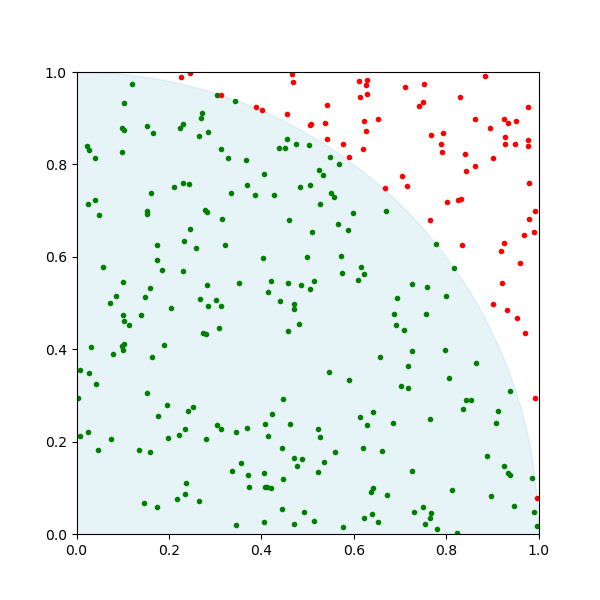

In [50]:
from matplotlib.animation import FuncAnimation

# Število točk
N = 300

# Priprava osnovne slike - enako kot prej
fig, ax = plt.subplots(figsize=(6,6))
circle = plt.Circle((0,0), 1, color='lightblue', alpha=0.3)
ax.add_patch(circle)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')

# Pripravimo "prazne" grafe - namesto seznama x in y koordinat, podamo prazna seznama:
inside, = ax.plot([], [], 'go', markersize=3)  # točke v krogu, g za "green", o za obliko pike, merkersize določa velikost pike
outside, = ax.plot([], [], 'ro', markersize=3) # točke zunaj, r za "red"
def init():
    inside.set_data([], [])
    outside.set_data([], [])

x_tocke = np.random.rand(N)
y_tocke = np.random.rand(N)

def update(frame): 
    x = x_tocke[:frame]
    y = y_tocke[:frame]
    
    # Ustvarmo masko. Maska je seznam, ki ima vrednosti True in False. Če potem zapišemo
    # y=x[maska], bodo v seznam y shranjene tiste vrednosti iz x-a, če je na tem mestu tudi True
    # Npr., če je x=[1,2,3,4,5] in maska [F,T,F,T,F], bo y=x[maska] dal y=(2,4)
    maska = x**2 + y**2 <= 1 
    inside.set_data(x[maska], y[maska])
    # enako kot prej - samo da je maska negirana - torej True in False se zamenjajo
    outside.set_data(x[~maska], y[~maska])
    
    
    return inside, outside

#še postavitev animacije - interval določa hitrost, repeat pa če se animacija ponavlja ali ne
ani = FuncAnimation(fig, update, frames=N, init_func=init, interval=10, repeat=False)
plt.show()




## 2. Graf z šumom

Z generiranjem naključnih števil, porazdeljenih po normalni porazdelitvi, lahko simuliramo napako pri meritvi ali šum v signalu.
Spodaj je prikazan primer, kako lahko na podatkih, ki naj bi sledili sinusni funkciji, simuliramo naključne napake.

<IPython.core.display.Javascript object>


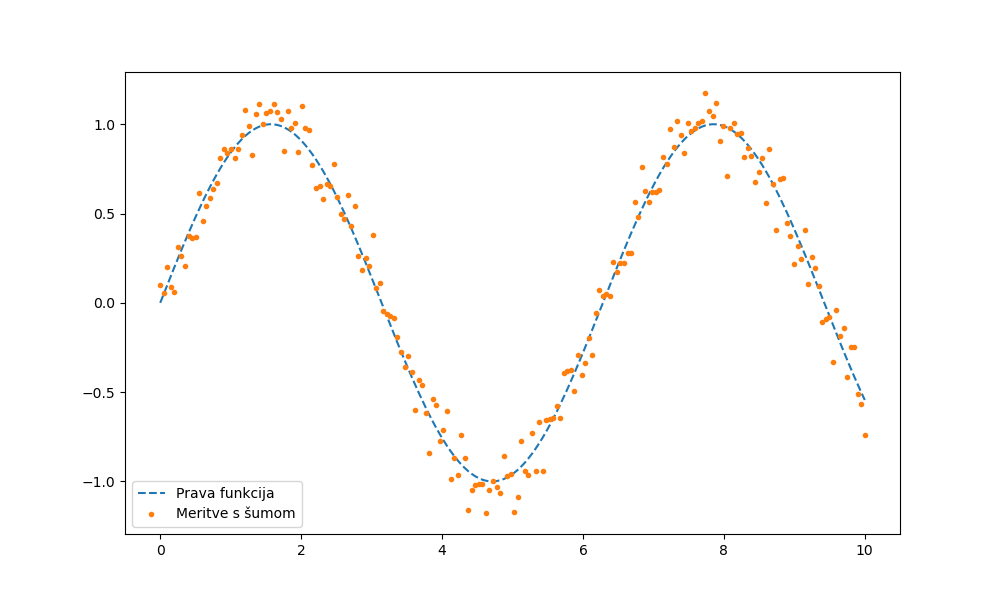

In [51]:
# Najprej definirajmo funkcijo, ki predstavlja meritev brez napake (v našem primeru sinusna funkcija)
N= 200 #definiramo število točk
def Sinus(x,A,omega,phi):
    return A*np.sin(omega*x+phi)

# Generiramo in narišemo podatke brez šuma
A=1.0
omega=1.0
phi=0.0
x =np.linspace(0,10,N) #generiramo N enako razmaknjenih števil med 0 in 10
y = Sinus(x,A,omega,phi)
#Narišemo funkcijo
plt.figure(figsize=(10, 6))
plt.plot(x, y, '--', label='Prava funkcija') # '--'pomeni da narišemo kot črtkano črto

#sedaj dodamo še šum z povprečjem 0 in standardno deviacijo 0.1
povp=0
std=0.1
z=y+rnd.normal(povp,std,N)
plt.plot(x,z,'o',label='Meritve s šumom',markersize=3)

plt.legend()
plt.show()

### Obdelava simuliranega signala s šumom

Ko imamo simuliran signal s šumom, ga lahko obdelamo na dva načini:

1. **"Fitanje"** ali **regresija** — poiščemo funkcijo, ki se signalu najbolj prilega.

2. **Filtriranje** — uporabimo filtre, na primer Savitzky-Golayev filter, za zmanjšanje šuma.

**Fitanje signala**

Pri fitanju iščemo funkcijo, ki se najbolje prilega podatkom.
To metodo uporabljamo predvsem takrat, ko vemo, kakšne oblike so naši podatki (tj. kateri funkciji sledijo).
Za oceno prileganja potrebujemo mero napake. Najpogosteje uporabljamo **metodo najmanjših kvadratov**, lahko pa uporabimo tudi druge metode.

Metoda najmanjših kvadratov:
Za vsako točko izmerimo oddaljenost od krivulje (absolutna napaka).Za vse te napake izračunamo vsoto kvadratov (variacijo).Krivulja z najmanjšo variacijo je tista, ki se najbolj prilega našim meritvam.

V Pythonu to lahko enostavno izvedemo z uporabo ukaza **curve_fit** iz knjižnice **scipy**.

<IPython.core.display.Javascript object>


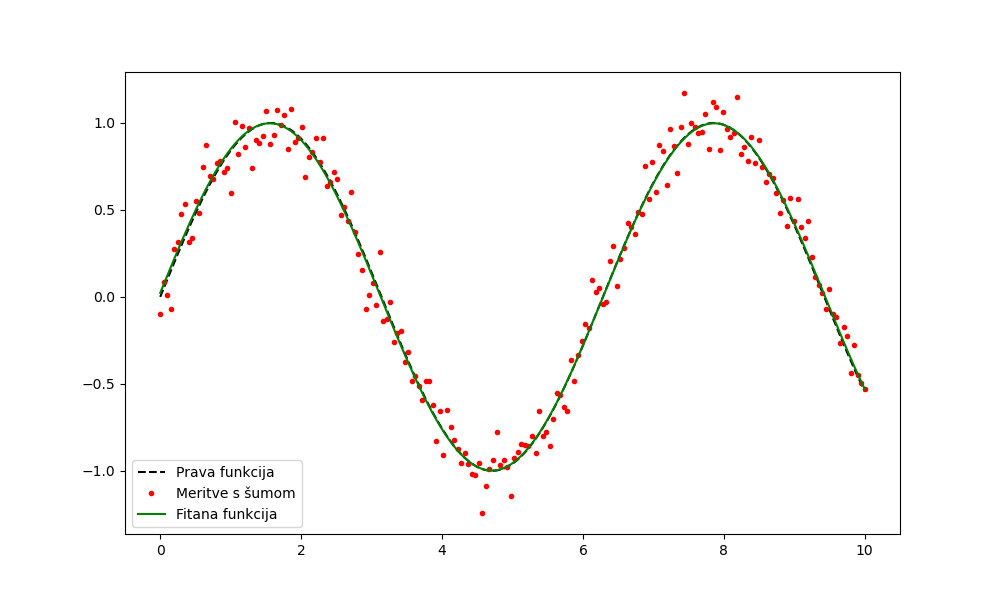

In [52]:
from scipy.optimize import curve_fit

# Generiramo podatke - enako kot prej
N= 200 
def Sinus(x,A,omega,phi):
    return A*np.sin(omega*x+phi)

A=1.0
omega=1.0
phi=0.0
x =np.linspace(0,10,N)
y = Sinus(x,A,omega,phi)
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k--', label='Prava funkcija') #k-črna črta, -- črtkasta črta

#dodajanje šuma
std=0.1
z=y+rnd.normal(povp,std,N)
plt.plot(x,z,'ro',label='Meritve s šumom',markersize=3) #r-rdeče, o-pike

# "fittanje"
# v ukaz curve_fit po vrsti podamo argumente: funkcijo, listo z x-koordinatami točk, listo z y-koordinatami točk
# če želimo lahko v obliko p0=[lista parametrov] podamo še začetne vrednosti parametrov, 
# ki jih program nato  optimizira. Ukaz curve_fit vrne dva parametra - prvi je array, ki vsebuje 
#vrednosti parametrov, drugi je array napak, iz katerega lahko razberemo kako dobro je pilagajanje
parametri, napaka = curve_fit(Sinus, x, z, p0=[1, 1, 0])
#uporabili smo *, da nam razpakira parametre iz arraya
y_fit = Sinus(x, *parametri)
plt.plot(x,y_fit,'g-',label='Fitana funkcija') #g- zelena črta ""-"" polna črta

plt.legend()
plt.show()


Če ne vemo, kakšne oblike so podatki (tj. kateri funkciji sledijo), se šuma lahko deloma znebimo z uporabo filtrirnih metod za glajenje. Najbolj znan tak filter je **metoda premikajočega se povprečja (moving average).**

Metoda potrebuje en parameter, in sicer število točk, ki jih povprečimo (oznaka k).
Po uporabi filtra za vsako točko zapišemo povprečje k zaporednih sosednjih vrednosti.

Primer: če je k = 3, po uporabi filtra velja:
- Prva točka ostane enaka kot v originalnem signalu.
- Druga točka je povprečje prve in druge točke.
- Tretja točka je povprečje prvih treh točk.
- Četrta točka je povprečje druge, tretje in četrte točke.
- Peta točka je povprečje tretje, četrte in pete točke … in tako naprej.

Posplošitev metode premikajočega se povprečja je **Savitzky-Golayev filter**.
Namesto povprečja skozi točke fita polinom n-te stopnje, kjer je n parameter.
Metoda premikajočega se povprečja je pravzaprav Savitzky-Golayev filter s n = 1.

V Pythonu lahko za glajenje podatkov s pomočjo **Savitzky-Golayevega filtra** preprosto uporabimo ukaz iz knjižnice **scipy**.


<IPython.core.display.Javascript object>


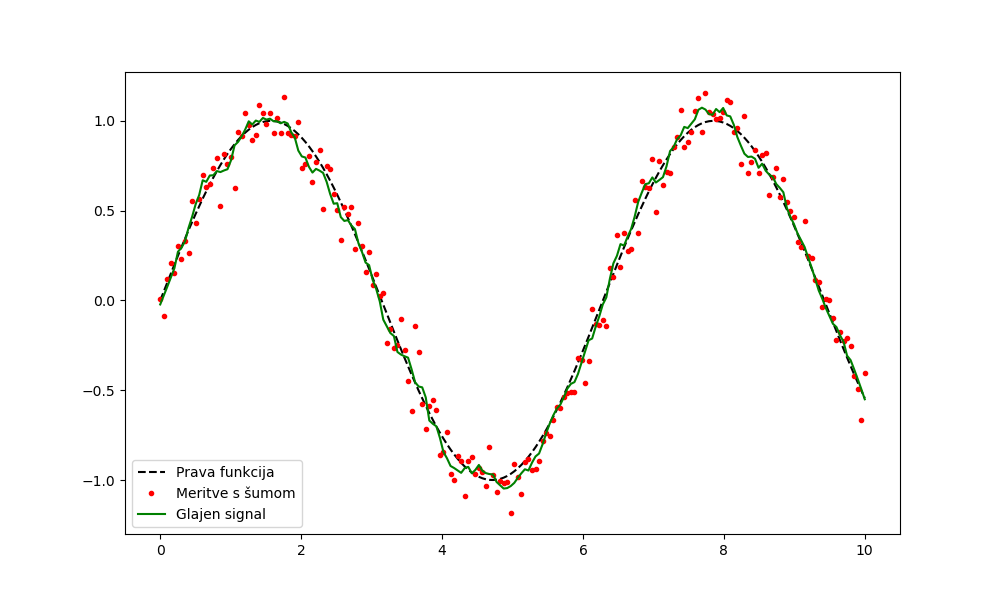

In [54]:
from scipy.signal import savgol_filter

# Generiramo podatke - enako kot prej
N= 200 
def Sinus(x,A,omega,phi):
    return A*np.sin(omega*x+phi)

A=1.0
omega=1.0
phi=0.0
x =np.linspace(0,10,N)
y = Sinus(x,A,omega,phi)
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'k--', label='Prava funkcija') #k-črna črta, -- črtkasta črta

#dodajanje šuma
std=0.1
z=y+rnd.normal(povp,std,N)
plt.plot(x,z,'ro',label='Meritve s šumom',markersize=3) #r-rdeče, o-pike

#glajenje
# fita okno 10 točk z polinomom druge stopnje
y_glajen = savgol_filter(z, window_length=10, polyorder=2)
plt.plot(x,y_glajen,'g-',label='Glajen signal')

plt.legend()
plt.show()


## 3. Program za učenje poštevanke

Spodaj je preprost program za učenje poštevanke.
Računalnik naključno izbira par številk med 1 in 10, nas sprašuje po njihovem produktu in preveri naš odgovor.

**Opomba:** V programu smo uporabili ukaz input, ki počaka na uporabnikov odgovor in ga shrani v dano spremenljivko. Ne glede na to, kakšen odgovor uporabnik vnese, se ta vedno shrani kot spremenljivka tipa **string**.

Če bi v if stavku zapisali le **if odg == a*b**, bi ta stavek v vsakem primeru vrnil **False**, saj primerja string z integerjem. To pomeni, da spremenljivki nikakor ne moreta biti enaki — npr. znak "5" ni enak številki 5.

Zato v if stavku uporabimo ukaz **int(x)**, ki spremenljivko x pretvori v integer. Če to ni mogoče (npr. če uporabnik vnese črko), program javi napako

In [13]:
N=5 # število poiskusov
točke=0
for i in range(N):
    a=rnd.randint(1,11)
    b=rnd.randint(1,11)
    odg=input(f"Koliko je {a} krat {b}? ")
    if int(odg)==a*b:
        print("Bravo! Rezulat je pravilen.")
        točke=točke+1
    else:
        print(f"Rezultat je žal napačen. Pravilni rezultat je {a*b}.")
print("")        
print(f"Dosegli ste {točke} od {N} možnih točk.")        

Koliko je 8 krat 10? 80
Bravo! Rezulat je pravilen.
Koliko je 4 krat 4? 16
Bravo! Rezulat je pravilen.
Koliko je 3 krat 3? 9
Bravo! Rezulat je pravilen.
Koliko je 6 krat 2? 12
Bravo! Rezulat je pravilen.
Koliko je 10 krat 10? 100
Bravo! Rezulat je pravilen.

Dosegli ste 5 od 5 možnih točk.
